In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

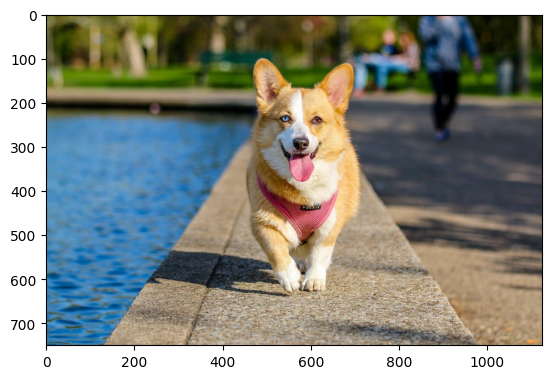

In [3]:
full=cv2.imread('dog.jpeg')
full=cv2.cvtColor(full,cv2.COLOR_BGR2RGB)  #as cv2 reads in bgr we want rgb 
plt.imshow(full)


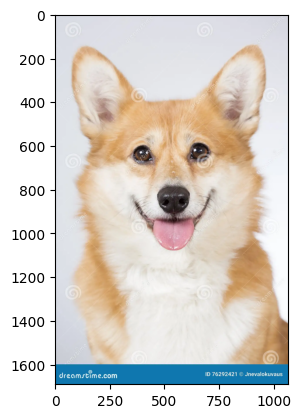

In [4]:
face=cv2.imread('dogface.webp')
face=cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [5]:
face.shape  #1690 1067 3 
#full.shape  # 750 1125 3
 

(1690, 1067, 3)

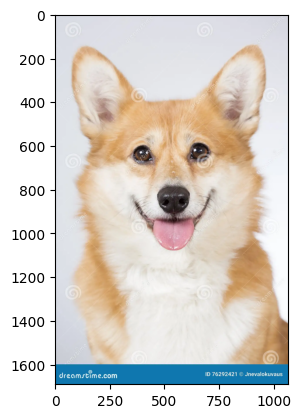

In [6]:
# face.resize((500,500,3))
# face.shape
# face.shape=(500,500,3)
plt.imshow(face)   # face must be samller  reshape se just ek part aa rha hai 


In [7]:
#all 6 mryhods for comparing in a list
methods=['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

In [ ]:
for m in methods:
    #create copy of the imahe 
    full_copy=full.copy()
    method=eval(m)  #conerts string to function

    #trmplte match
    res=cv2.matchTemplate(full_copy,face,method)

    min_val,max_val,min_loc,max_loc=cv2.minMaxLoc(res)

    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left=min_loc
    else:
        top_left=max_loc 
    height,width,channels=face.shape  #drwaing the rectangle 

    bottom_right=(top_left[0]+width,top_left[1]+height)

    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)

    plt.subplot(121)
    plt.imshow(res)  #heat map result
    plt.title('HEAT MAP ')
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION TEMPLATE')  #we can optimise the mthods to use for better resut 
    plt.suptitle(m)

    plt.show()  #else subplot will override







In [12]:
methodd=eval('cv2.TM_CCOEFF')
res=cv2.matchTemplate(full,face, methodd)
plt.imshow(res)  #shows a dot near a place where it finds highest match 
#heat map ki trah 




error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\templmatch.cpp:1175: error: (-215:Assertion failed) _img.size().height <= _templ.size().height && _img.size().width <= _templ.size().width in function 'cv::matchTemplate'
